In [48]:
# konlpy : 한국어 형태소 분석기
!pip install konlpy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
!pip install jpype1


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("https://news.naver.com/").text
soup = bs(html, 'html.parser')

body = soup.select_one("body")

# 불필요한 키워드는 제거할 것

text = body.get_text().strip().replace("\n", " ")
stopwords = ['본문', '바로가기', 'NAVER', '검색', '이슈', '닫기', '구독'] # 불용어

text

'본문 바로가기        NAVER  뉴스   엔터     스포츠     날씨     프리미엄     대선           검색             언론사별 정치 경제 사회 생활/문화 IT/과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 알고리즘 안내 정정보도 모음              콘텐츠   6.4(수)   전체 언론사 뉴스스탠드 라이브러리           언론사편집  기자                                                 연재                                                                  구독설정                                       속보     이 대통령, 박성재 법무장관만 사표 수리…다른 국무위원 사의 반려    부산일보       \'큰 절\' 김문수 "국민께 큰 역사적 죄 지었다…당 내 민주주의 무너져"    매일신문       이재명, 첫 행정명령으로 \'비상경제대응TF\' 구성 지시    MBC       이 대통령 \'1호 행정명령\'은…비상경제점검 TF 구성 지시    강원도민일보       李 대통령, 1호 행정명령 "비상경제점검TF 구성하라"    한국일보       이주호, 全 국무위원 사의 표명...李대통령, 박성재 법무 외 사의 반려    디지털타임스  내용작성전      이 대통령 \'1호 행정명령\' 비상경제점검 TF 구성 지시    JTBC  내용작성전      전북대, 교수 강제추행을 성희롱으로 \'축소\'.. 교육부 감사 26건 지적    전주MBC      속보 닫기             농민신문 06월 04일 17:22  구독      이재명 대통령 “당장 시행 가능한 경제 회생책 필요”    국무총리에 김민석, 국정원장에 이종석 내정…이 대통령, 첫 인사 발표   “농지연금 신청했는데 감감무소식”…신청농가 ‘허탈’   이재명 대통령·김문수는 받고 이준석은 못 받는 ‘이것’         

### konlpy.tag.Okt
- Okt (Open Korean Text): KoNLPy에서 제공하는 한국어 형태소 분석기
- `morphs(텍스트)` : 형태소 단위로 텍스트를 분리, 단어 단위로 분리된 리스트 반환
- pos(text, norm=False, stem=False) : 형태로를 분리할 때 품사(명사, 동사, 형용사, 조사, ...) 정보를 함께 반환 / part of speech (품사)
    - norm=True : 문장을 정규화 ("ㅋㅋ" -> "ㅋ")
    - stem=True: 어간 추출 ("먹었다" -> "먹다)

> 형태소: 의미를 가진 최소 단위

In [51]:
from konlpy.tag import Okt  # 트위터가 만든 형태 분석기
okt = Okt()

In [52]:
okt.morphs("나는 멋진 학원에 갑니다.")

['나', '는', '멋진', '학원', '에', '갑니다', '.']

In [53]:
okt.pos("나는 멋진 학원에 갑니다.")

[('나', 'Noun'),
 ('는', 'Josa'),
 ('멋진', 'Adjective'),
 ('학원', 'Noun'),
 ('에', 'Josa'),
 ('갑니다', 'Verb'),
 ('.', 'Punctuation')]

In [54]:
words = okt.pos(text)
words[:10]

[('본문', 'Noun'),
 ('바로가기', 'Noun'),
 ('NAVER', 'Alpha'),
 ('뉴스', 'Noun'),
 ('엔터', 'Noun'),
 ('스포츠', 'Noun'),
 ('날씨', 'Noun'),
 ('프리미엄', 'Noun'),
 ('대선', 'Noun'),
 ('검색', 'Noun')]

In [55]:
# 품사 별로 토큰화
words = []
for word, pos in okt.pos(text):
    if word not in stopwords and pos in ['Noun', 'Verb', 'Adjective']:
        words.append(word)
words[:10]

['뉴스', '엔터', '스포츠', '날씨', '프리미엄', '대선', '언론', '사별', '정치', '경제']

## ["키워드": 등장횟수] 형태로 가공하자!

In [56]:

!pip install Counter

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\Desktop\Daeun-ai\08 Data-Analysis-Python\source\basic\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\

In [57]:
from collections import Counter

stat = Counter(words)
stat

Counter({'대통령': 159,
         '이재명': 139,
         '경제': 51,
         '정부': 44,
         '이': 40,
         '속보': 32,
         '국민': 32,
         '비상': 30,
         '해보세요': 28,
         '법': 27,
         '관심': 27,
         '사의': 26,
         '첫': 26,
         '행정명령': 26,
         '것': 26,
         '대선': 25,
         '구성': 24,
         '점검': 24,
         '당선': 24,
         '박': 22,
         '국무위원': 22,
         '법무': 21,
         '반려': 21,
         '트럼프': 21,
         '성재': 20,
         '호': 20,
         '용산': 20,
         '이준석': 19,
         '관세': 19,
         '일보': 18,
         '외': 18,
         '장관': 17,
         '김문수': 17,
         '김민석': 17,
         '대법관': 17,
         '취임': 17,
         '무덤': 17,
         '명': 17,
         '지시': 16,
         '증원': 16,
         '한국': 15,
         '할': 14,
         '신문': 13,
         '기자': 13,
         '소위': 13,
         '통과': 13,
         '뉴스': 12,
         '이종석': 12,
         '대통령실': 12,
         '대': 12,
         '국무총리': 11,
         '국정원장': 11,


In [58]:
# most_common(숫자) : 가장 카운트가 많은 숫자 개수 만큼
stat = Counter(words).most_common(50)
stat

[('대통령', 159),
 ('이재명', 139),
 ('경제', 51),
 ('정부', 44),
 ('이', 40),
 ('속보', 32),
 ('국민', 32),
 ('비상', 30),
 ('해보세요', 28),
 ('법', 27),
 ('관심', 27),
 ('사의', 26),
 ('첫', 26),
 ('행정명령', 26),
 ('것', 26),
 ('대선', 25),
 ('구성', 24),
 ('점검', 24),
 ('당선', 24),
 ('박', 22),
 ('국무위원', 22),
 ('법무', 21),
 ('반려', 21),
 ('트럼프', 21),
 ('성재', 20),
 ('호', 20),
 ('용산', 20),
 ('이준석', 19),
 ('관세', 19),
 ('일보', 18),
 ('외', 18),
 ('장관', 17),
 ('김문수', 17),
 ('김민석', 17),
 ('대법관', 17),
 ('취임', 17),
 ('무덤', 17),
 ('명', 17),
 ('지시', 16),
 ('증원', 16),
 ('한국', 15),
 ('할', 14),
 ('신문', 13),
 ('기자', 13),
 ('소위', 13),
 ('통과', 13),
 ('뉴스', 12),
 ('이종석', 12),
 ('대통령실', 12),
 ('대', 12)]

In [59]:
# 워드 클라우드
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
# 폰트 불러오기: ../my_fonts/NanumGothic-ExtraBold.ttf
from wordcloud import WordCloud

In [61]:
wc = WordCloud(font_path='../my_fonts/NanumGothic-ExtraBold.ttf', 
                background_color='white', 
                max_font_size=200,
                width=700, height=450)
cloud = wc.generate_from_frequencies(dict(stat))

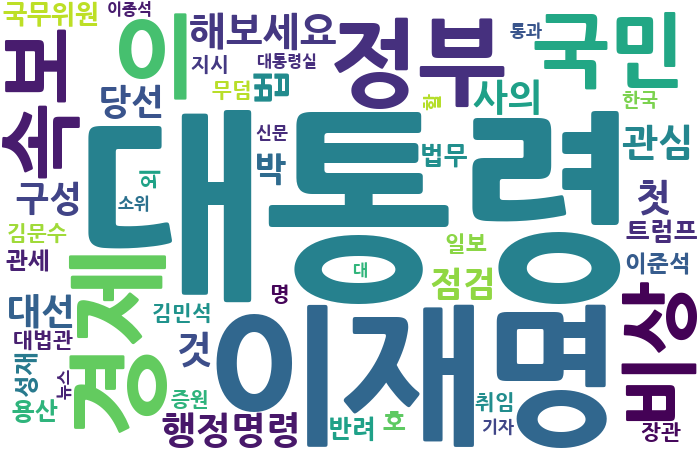

In [62]:
cloud.to_image()

In [63]:
# 워드 클라우드 이미지를 파일로 저장
from time import strftime
cloud.to_file(f"{strftime('%Y%m%d%H')}_news.jpg")